In [1]:
import pickle 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [92]:
pickle_in = open('cleaned_df.pickle','rb')
df = pickle.load(pickle_in) #loading cleaned dataframe

In [93]:
df.head()

,Product.Name,Category,Brand,Seller,Price,Fees,Net,Weight,Rating,Rank,Sellers,LQS,Sales,Revenue,Date,Rated,X of Rating
ASIN,,,,,,,,,,,,,,,,,
B06XFMZX5W,"""Beauty and the Beast"" Rose Kit, Red Silk Rose...","Arts, Crafts & Sewing",Louis Garden,Louis Garden,25.99,8.65,17.34,2.1 lbs,4.1 (290),1942.0,3.0,47.0,457.0,11877.43,2018-10-07 00:00:00,4.1,290.0
B0756PZL6G,#11 Hobby Blades - Precision Cut SK5 Carbon St...,"Arts, Crafts & Sewing",Unknown,Selective 21,10.89,4.04,6.85,0.2 lbs,4.4 (20),2106.0,1.0,41.0,564.0,6141.96,2018-10-07 00:00:00,4.4,20.0
B00FBFUB3U,#3 4KG Foundry Clay Graphite Crucibles Cup Fur...,"Arts, Crafts & Sewing",Rosenthal Collection,Five Star Savings,19.95,7.84,12.11,2.35 lbs,4.2 (172),8115.0,1.0,35.0,295.0,5885.25,2018-10-07 00:00:00,4.2,172.0
B01M6XQIXE,"(10) 12"" x 12"" Sheets - Oracal 651 Black Adhes...","Arts, Crafts & Sewing",ORACAL,Vinyl One,12.99,5.14,7.85,0.4 lbs,4.3 (38),2352.0,2.0,65.0,383.0,4975.17,2018-10-07 00:00:00,4.3,38.0
B01MAXJ4KI,"(10) 12"" x 12"" Sheets - Oracal 651 Black Adhes...","Arts, Crafts & Sewing",ORACAL,Vinyl One,12.99,5.14,7.85,0.6 lbs,4.3 (38),2344.0,2.0,45.0,377.0,4897.23,2018-10-07 00:00:00,4.3,38.0


In [4]:
df_description = df['Product.Name']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

vectorizer = TfidfVectorizer() #instantiating Text Vectorizer
ks = np.arange(2,15)  #range of k-values
df_matrix = vectorizer.fit_transform(df_description)  #creating spares matrix from product descriptions
inertia = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_matrix)
    inertia.append(model.inertia_)

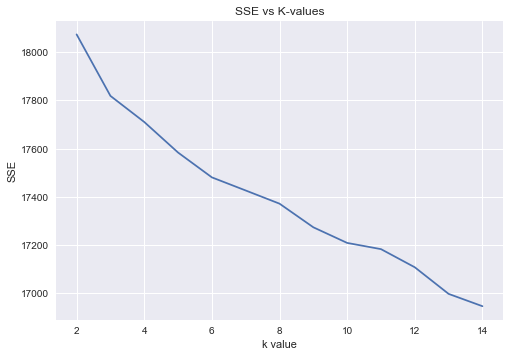

In [6]:
#ploting a chart showing SS for each K
plt.plot(ks,inertia)
plt.xlabel('k value')
plt.ylabel('SSE')
plt.title('SSE vs K-values')
plt.show()

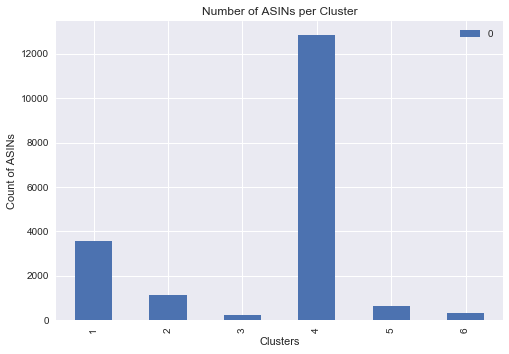

In [7]:
#find the number of points per cluster under cluster=7
model = KMeans(n_clusters=6).fit(df_matrix)

Npercluster = np.bincount(model.labels_)
nindex = np.arange(1,7)
clusterCount = pd.DataFrame(Npercluster,index=nindex)

clusterCount.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Count of ASINs')
plt.title('Number of ASINs per Cluster (KMeans)')
plt.show()

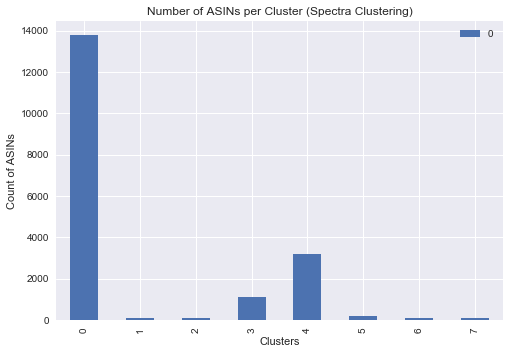

In [24]:
Npercluster = np.bincount(sc_model.labels_)
#nindex = np.arange(1,7)
clusterCount = pd.DataFrame(Npercluster)

clusterCount.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Count of ASINs')
plt.title('Number of ASINs per Cluster (Spectra Clustering)')
plt.show()

In [7]:
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [9]:
#modeling using SpectralClustering
sc_model = SpectralClustering().fit(df_matrix)
sc_predict = sc_model.predict(df_matrix)
sc_score = silhouette_score(df_matrix,sc_predict)

ValueError: bad input shape ()

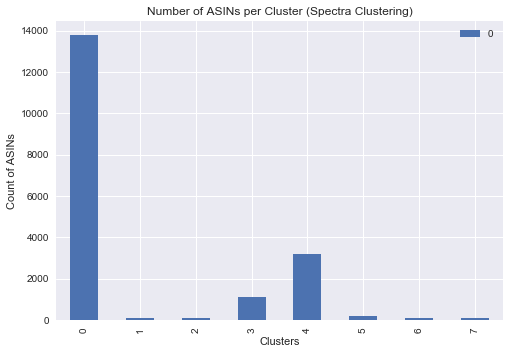

In [39]:
#building graph of count of products per clusters
Npercluster = np.bincount(sc_model.labels_)
#nindex = np.arange(1,7)
clusterCount = pd.DataFrame(Npercluster)

clusterCount.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Count of ASINs')
plt.title('Number of ASINs per Cluster (Spectra Clustering)')
plt.show()

In [12]:
#modeling using DBSCAN
dense_df = df_matrix.toarray()
#db_dense = DBSCAN(eps=1).fit(dense_df)
db_predict = db_dense.predict(dense_df) 
db_score = silhouette_score(dense_df,db_predict)

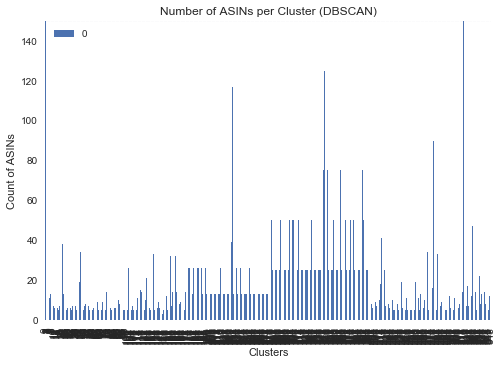

In [42]:
#building graph of count of products per clusters
Npercluster = np.bincount(db_dense.labels_+1)
#nindex = np.arange(1,7)
clusterCount = pd.DataFrame(Npercluster)

clusterCount.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Count of ASINs')
plt.title('Number of ASINs per Cluster (DBSCAN)')
plt.ylim(top=150)
plt.show()

In [37]:
#modeling using Agglomerative clustering
dense_df = df_matrix.toarray()
ac_model = AgglomerativeClustering().fit(dense_df)
ac_predict = ac_model.predict(dense_df) #used to predict future labels
ac_score = silhouette_score(dense_df,ac_predict)

KeyboardInterrupt: 

In [ ]:
#building graph of count of products per clusters
Npercluster = np.bincount(db_dense.labels_+1)
#nindex = np.arange(1,7)
clusterCount = pd.DataFrame(Npercluster)

clusterCount.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Count of ASINs')
plt.title('Number of ASINs per Cluster (DBSCAN)')
plt.show()

In [22]:
#kmeans score
kmean_predict = KMeans(n_clusters=6).fit_predict(df_matrix)
kmean_score = silhouette_score(df_matrix,kmean_predict)

In [23]:
#print('Affinity Propagation score is %s' % (ap_score))
print('Spectral Clustering score is %s' % (sc_score))
print('Agglomerative Clustering score is %s' % (ac_score))
print('DBSCAN score is %s' % (db_score))
print('KMeans score is %s' %(kmean_score))

Spectral Clustering score is 0.0252360867182
Agglomerative Clustering score is 0.0166683937743
DBSCAN score is 0.390444032295
KMeans score is 0.0266529749297


In [48]:
#saving models
pickle_out=open('KMeans_model.pickle','wb')
pickle.dump(model,pickle_out)

In [47]:
#saving DB model
pickle_out = open('DBSCAN_model.pickle','wb')
pickle.dump(db_dense,pickle_out)

### Next, using KMeans, DBSCAN, and Amazon to build random forest 

In [70]:
len(db_dense.labels_)

18752

In [94]:
#creating cluster labels based on DBSCAN model
db_df = df
db_df['cluster']=db_dense.labels_
db_df['cluster']=[str(cell) for cell in df['cluster']]


In [112]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18752 entries, B06XFMZX5W to B01HKGMFAO
Data columns (total 18 columns):
Product.Name    18752 non-null object
Category        18752 non-null object
Brand           18752 non-null object
Seller          18752 non-null object
Price           18752 non-null float64
Fees            18739 non-null float64
Net             18739 non-null float64
Weight          18752 non-null object
Rating          18752 non-null object
Rank            18752 non-null float64
Sellers         18752 non-null float64
LQS             18752 non-null float64
Sales           18752 non-null float64
Revenue         18752 non-null float64
Date            18752 non-null object
Rated           18752 non-null float64
X of Rating     18752 non-null float64
cluster         18752 non-null object
dtypes: float64(10), object(8)
memory usage: 2.7+ MB


In [95]:
#creating cluster labels based on KMeans model
km_df = df
df['cluster']=model.labels_
df['cluster']=[str(cell) for cell in df['cluster']]

In [96]:
#creating dataframe to model with Amazon Categories
amz_df = df

In [113]:
#function to output ML model and metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def rfbuild(df):
    #creating dataframe to model after 
    cluster_rf = df.drop(['Product.Name','Category','Brand','Date','Rating','Weight','Seller','Revenue'], axis=1).dropna() #creating df with clustered datafram
    cluster_rf = df.dropna()
    cluster_rf = pd.get_dummies(cluster_rf)
    target = cluster_rf['Sales']
    features = cluster_rf.drop('Sales',axis=1)  

    feature_list = list(features.columns)  # to use as index later 
    features = np.array(features)
    target = np.array(target)

    #splitting data
    train_features,test_features,train_labels,test_labels = train_test_split(features,target,test_size=0.25,random_state=42)

    # Instantiate model with 100 decision trees
    rf = RandomForestRegressor(n_estimators = 100, oob_score = True, random_state = 42)

    # Train the model on training data
    rf.fit(train_features, train_labels.ravel())

    # Use the forest's predict method on the test data using DBSCAN
    predict = rf.predict(test_features)

    # Calculate the absolute errors
    errors = abs(predict - test_labels)
    avg_error = np.mean(errors)
    R2 = round(rf.oob_score,6)
    
    #returning model, predictions, errors, R2 score
    return rf, predict, avg_error, R2, feature_list

In [115]:
#creating dataframe to model after 
cluster_rf = db_df.drop(['Product.Name','Category','Brand','Date','Rating','Weight','Seller','Revenue'], axis=1).dropna() #creating df with clustered datafram
cluster_rf = df.dropna()
cluster_rf = pd.get_dummies(cluster_rf)
target = cluster_rf['Sales']
features = cluster_rf.drop('Sales',axis=1)  

feature_list = list(features.columns)  # to use as index later 
features = np.array(features)
target = np.array(target)

#splitting data
train_features,test_features,train_labels,test_labels = train_test_split(features,target,test_size=0.25,random_state=42)

# Instantiate model with 100 decision trees
db_rf = RandomForestRegressor(n_estimators = 100, oob_score = True, random_state = 42)

# Train the model on training data
db_rf.fit(train_features, train_labels.ravel())

# Use the forest's predict method on the test data using DBSCAN
db_predict = db_rf.predict(test_features)

# Calculate the absolute errors
db_errors = abs(db_predict - test_labels)
db_error = np.mean(db_errors)
db_R2 = round(db_rf.oob_score,6)

In [114]:
#returning rf models and metrics for DBSCAN 
db_rf,db_pred,db_error, db_R2, db_feat_list = rfbuild(db_df)

KeyboardInterrupt: 

In [ ]:
#returning rf models and metrics for KMeans
km_rf, km_pred, km_error, km_R2, km_feat_list = rfbuild(km_df)

In [ ]:
#returning rf models and metrics for Amazon Original
amz_rf, amz_pred, amz_error, amz_R2, km_feat_list = rfbuild(amz_df)

In [ ]:
#Comparing R2 scores and MAE
print('DBSCAN R2 score is %s' % (db_R2))
print('KMeans R2 score is %s' % (km_R2))
print('Original Amazon R2 score is %s' % (amz_R2))

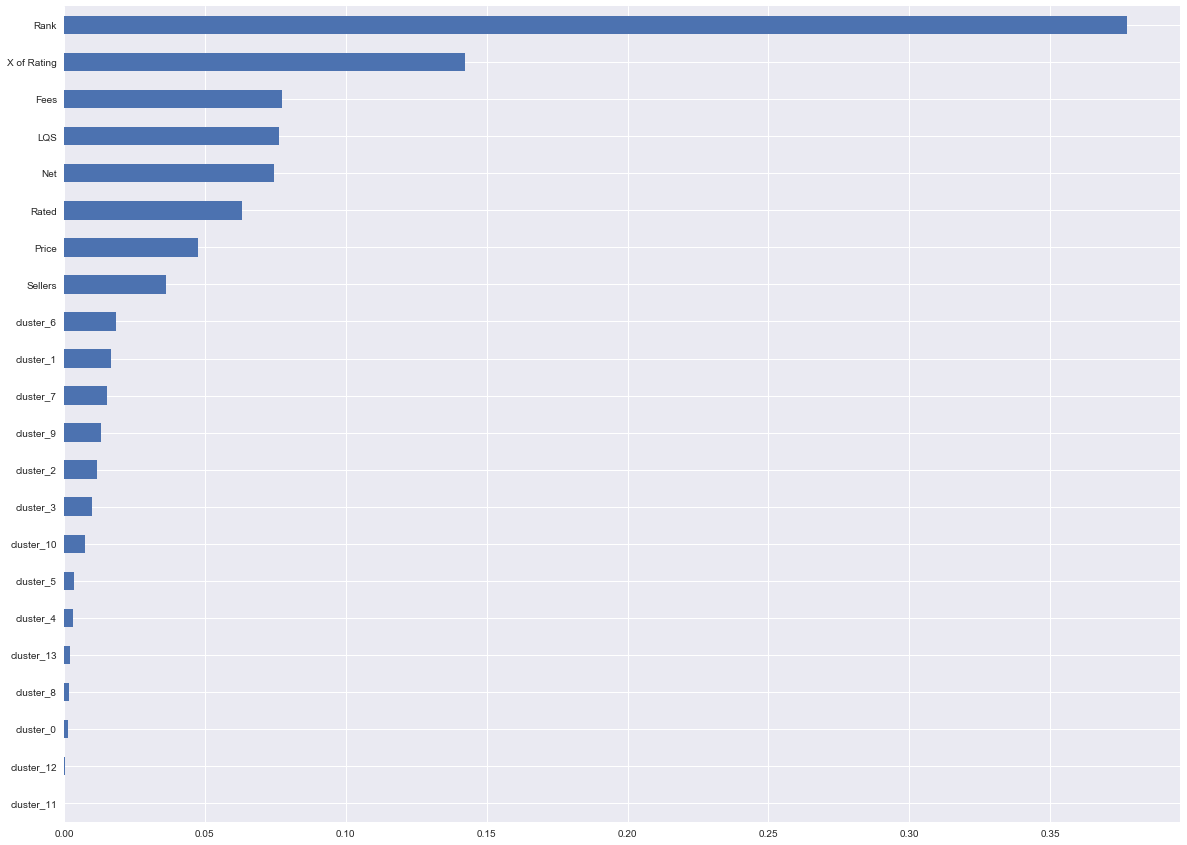

In [81]:
import matplotlib.pyplot as plt
#plotting feature importances for DBSCAN
feature_importances = pd.Series(db_rf.feature_importances_, index=db_feat_list)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh',figsize=(20,15))
plt.show()

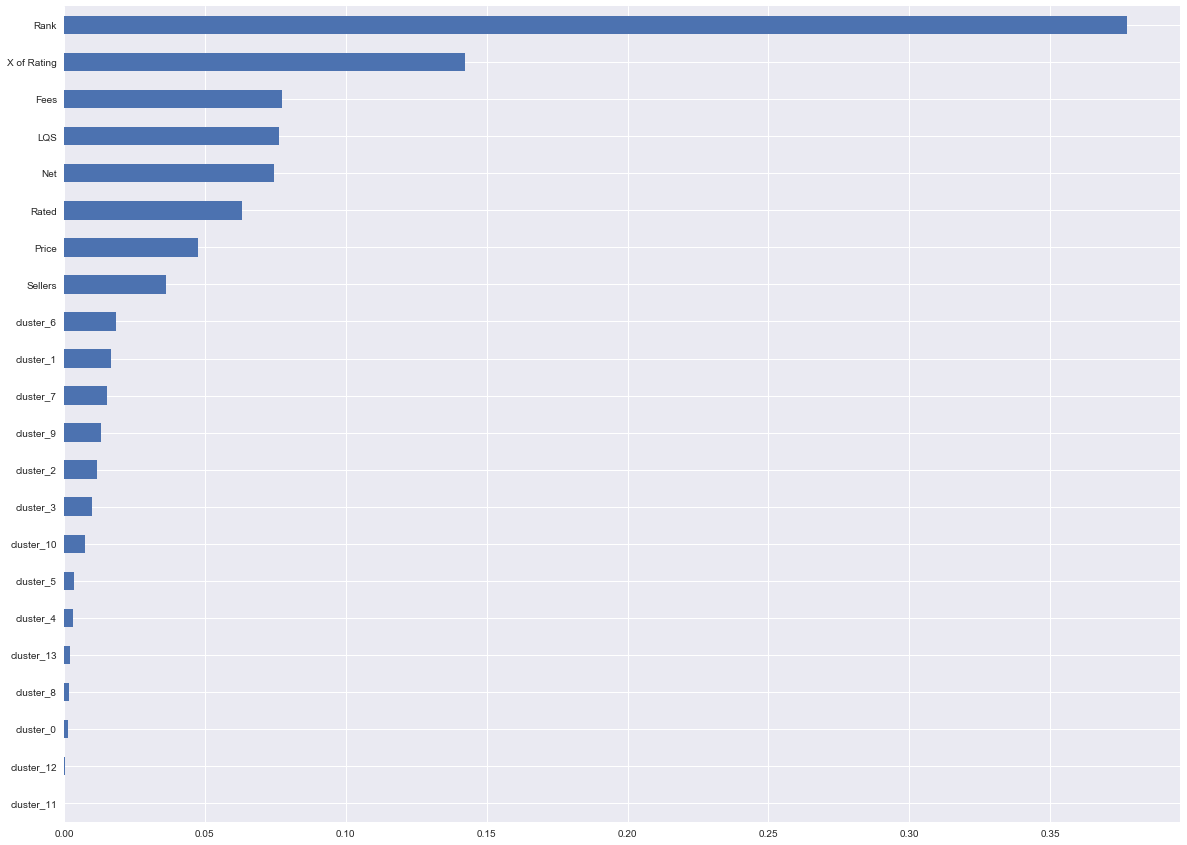

In [82]:
#plotting feature importances for KMeans
feature_importances = pd.Series(km_rf.feature_importances_, index=km_feat_list)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh',figsize=(20,15))
plt.show()

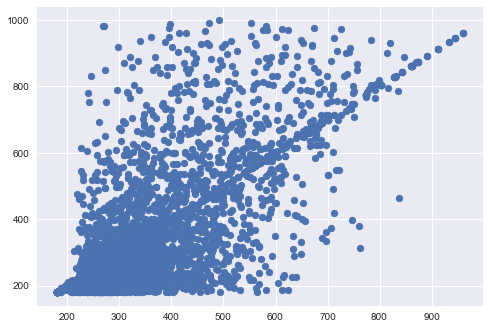

In [43]:
plt.scatter(predictions1000,test_labels)

plt.show()

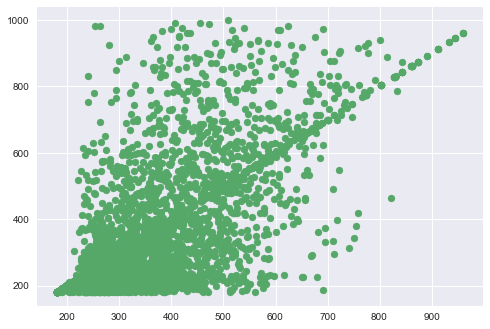

In [87]:
plt.scatter(predictions1000,test_labels)

plt.show()

In [88]:
predictions1000

array([ 293.   ,  372.273,  863.   , ...,  458.914,  312.263,  312.034])

In [89]:
test_labels

array([ 293.,  298.,  863., ...,  597.,  257.,  429.])

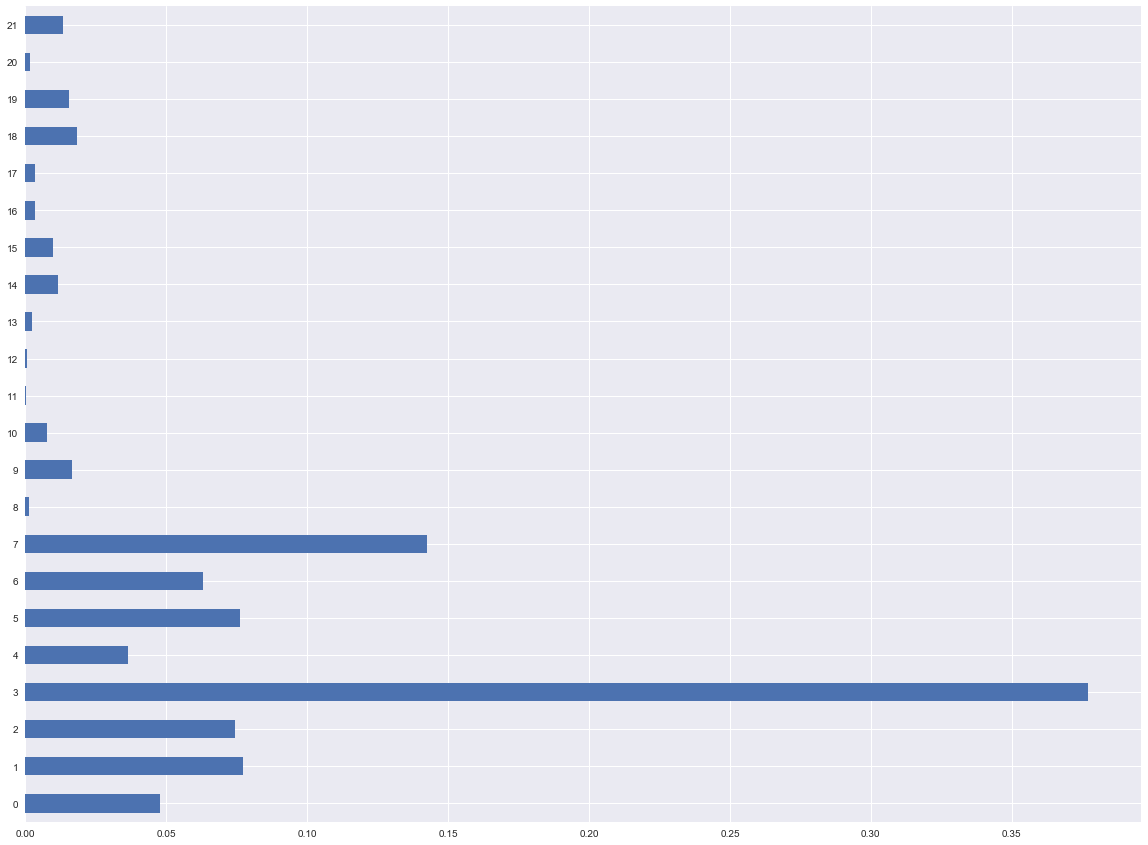

In [64]:
import matplotlib.pyplot as plt
#plotting feature importances
feature_importances = pd.Series(db_rf.feature_importances_, index=)
feature_importances[:10].sort_values(inplace=True)
feature_importances.plot(kind='barh',figsize=(20,15))
plt.show()

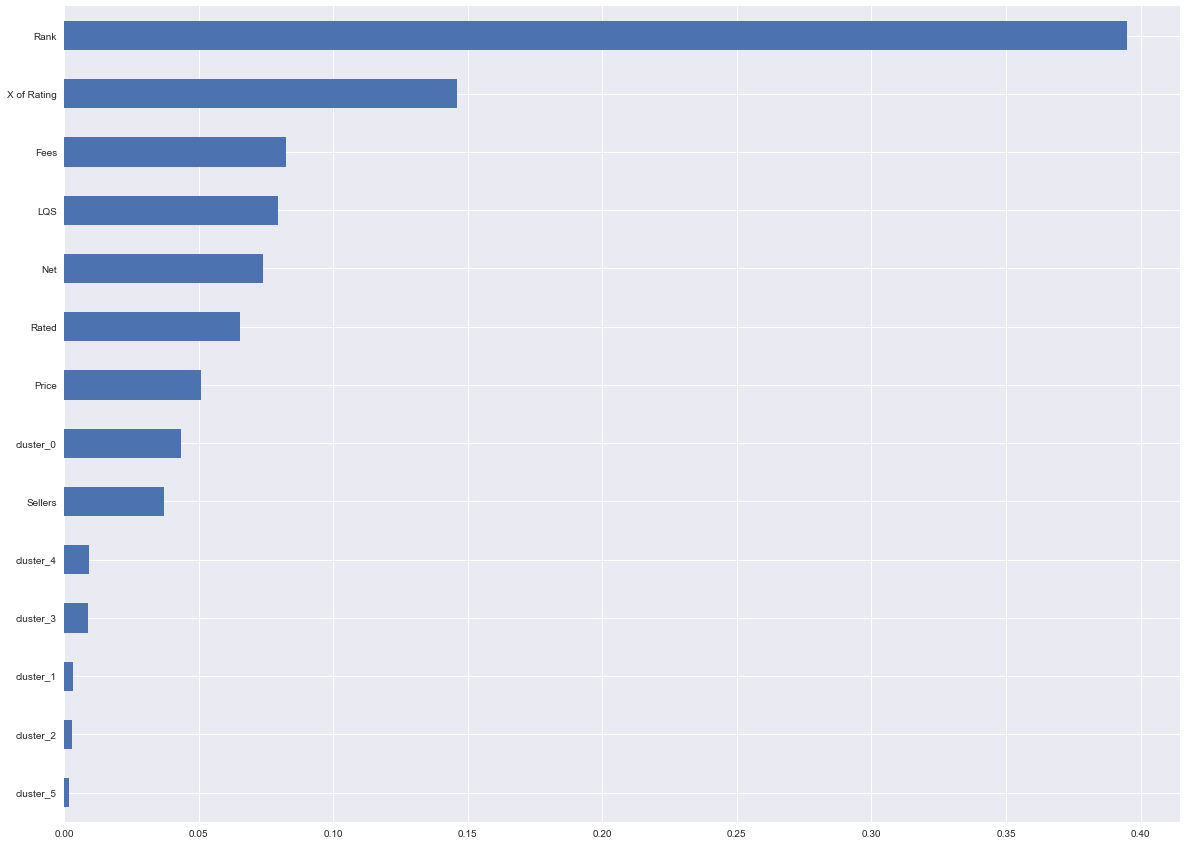

In [90]:
import matplotlib.pyplot as plt
#plotting feature importances
feature_importances = pd.Series(rf1000.feature_importances_, index=feature_list)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh',figsize=(20,15))
plt.show()

In [91]:
#creating dataframe to model with Amazon Categories
amz_rf = df.drop(['Product.Name','cluster','Brand','Date','Rating','Weight','Seller','Revenue'], axis=1).dropna() #creating df with clustered datafram
amz_rf = pd.get_dummies(amz_rf)
amz_target = amz_rf['Sales']
amz_features = amz_rf.drop('Sales',axis=1)  

amz_feature_list = list(amz_features.columns)
amz_features = np.array(amz_features)
amz_target = np.array(amz_target)

In [92]:
#importing trian test split
from sklearn.model_selection import train_test_split

#splitting data
amz_train_features,amz_test_features,amz_train_labels,amz_test_labels = train_test_split(amz_features,amz_target,test_size=0.25,random_state=42)

In [93]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 100 decision trees
amz1000 = RandomForestRegressor(n_estimators = 1000, oob_score = True, random_state = 42)

# Train the model on training data
amz1000.fit(amz_train_features, amz_train_labels.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [94]:
# Use the forest's predict method on the test data
amz_predictions1000 = amz1000.predict(amz_test_features)

# Calculate the absolute errors
amz_errors = abs(amz_predictions1000 - amz_test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(amz_errors), 2), 'degrees.')

Mean Absolute Error: 48.31 degrees.


In [95]:
print('R^2 score for Amazon Category 1000 decision trees is', round(amz1000.oob_score_, 6))

R^2 score for Amazon Category 1000 decision trees is 0.736387


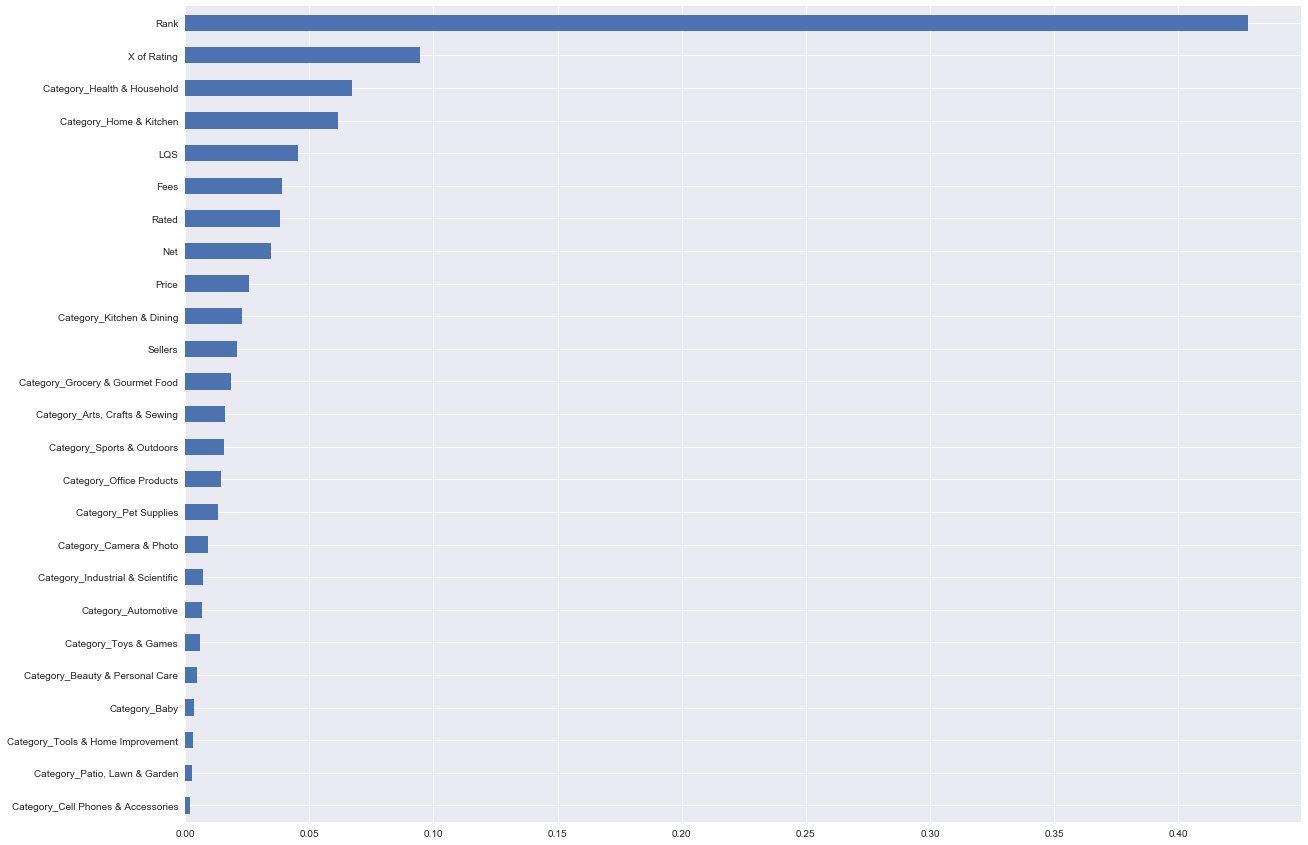

In [97]:
amz_feature_importances = pd.Series(amz1000.feature_importances_, index=amz_feature_list)
amz_feature_importances.sort_values(inplace=True)
amz_feature_importances.plot(kind='barh',figsize=(20,15))
plt.show()

In [ ]:
precision_recall_curve